In [1]:
# load all the packages required, but good practise is to load ONLY those required
# (importing all commands in a package using * can cause conflicts)
%matplotlib inline
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt import derived_field

In [2]:
np.__version__
from platform import python_version

print(python_version())

3.12.3


In [3]:
#location of the data for the final timestep of the N-body simulation - may need to amend this
location_finaltime = r"Enzo_64/DD0003/data0003"

In [4]:
# Make a derived field
# NB these must be defined BEFORE data is loaded
@derived_field(name = "radiusr", units = "Mpc", sampling_type="cell")
def _radiusr(field, data):
    center = dataset.domain_right_edge/2.0
    x = (data["x"] - center[0])
    y = (data["y"] - center[1])
    z = (data["z"] - center[2])
    return np.sqrt(x*x+y*y+z*z)

In [5]:
#Load the dataset
dataset = yt.load(location_finaltime)

/tmp/ipykernel_12580/1002656110.py:2: UserWarning: This dataset appears to be of type EnzoDataset, but the following requirements are currently missing: libconf
Please verify your installation.
  dataset = yt.load(location_finaltime)
yt : [INFO     ] 2025-07-01 14:57:02,518 Parameters: current_time              = 45.8164418476
yt : [INFO     ] 2025-07-01 14:57:02,518 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:57:02,519 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:57:02,519 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 14:57:02,520 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 14:57:02,520 Parameters: current_redshift          = 5.8172118864762
yt : [INFO     ] 2025-07-01 14:57:02,520 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 14:57:02,521 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 14:57:02,521 Para

In [6]:
#check that the dataset includes particles
dataset.particles_exist

Parsing Hierarchy : 100%|█████████████████████| 12/12 [00:00<00:00, 9518.09it/s]
yt : [INFO     ] 2025-07-01 14:57:02,536 Gathering a field list (this may take a moment.)


True

In [7]:
#print the list of fields in the dataset
dataset.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'GasEnergy'),
 ('enzo', 'Temperature'),
 ('enzo', 'TotalEnergy'),
 ('enzo', 'x-velocity'),
 ('enzo', 'y-velocity'),
 ('enzo', 'z-velocity'),
 ('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'metallicity_fraction'),
 ('io', 'particle_index'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_type'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('nbody', 'creation_time'),
 ('nbody', 'dynamical_time'),
 ('nbody

In [8]:
# ask yt what the code units mean
# yt will know this for Enzo, but not necessarily for a random dataset
# the default is cgs (cm, grams and seconds)
# note that Mpccm/h are comoving units = Mpc / (1+z) / h
# where z is the redshift and h is the scaled hubble constant
print(dataset.length_unit)
print(dataset.mass_unit)
print(dataset.velocity_unit)

128 Mpccm/h
4.890451593516588e+50 g
8586501033.599192 cm/s


yt : [INFO     ] 2025-07-01 14:57:03,065 xlim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:57:03,065 ylim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:57:03,068 xlim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:57:03,068 ylim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:57:03,070 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



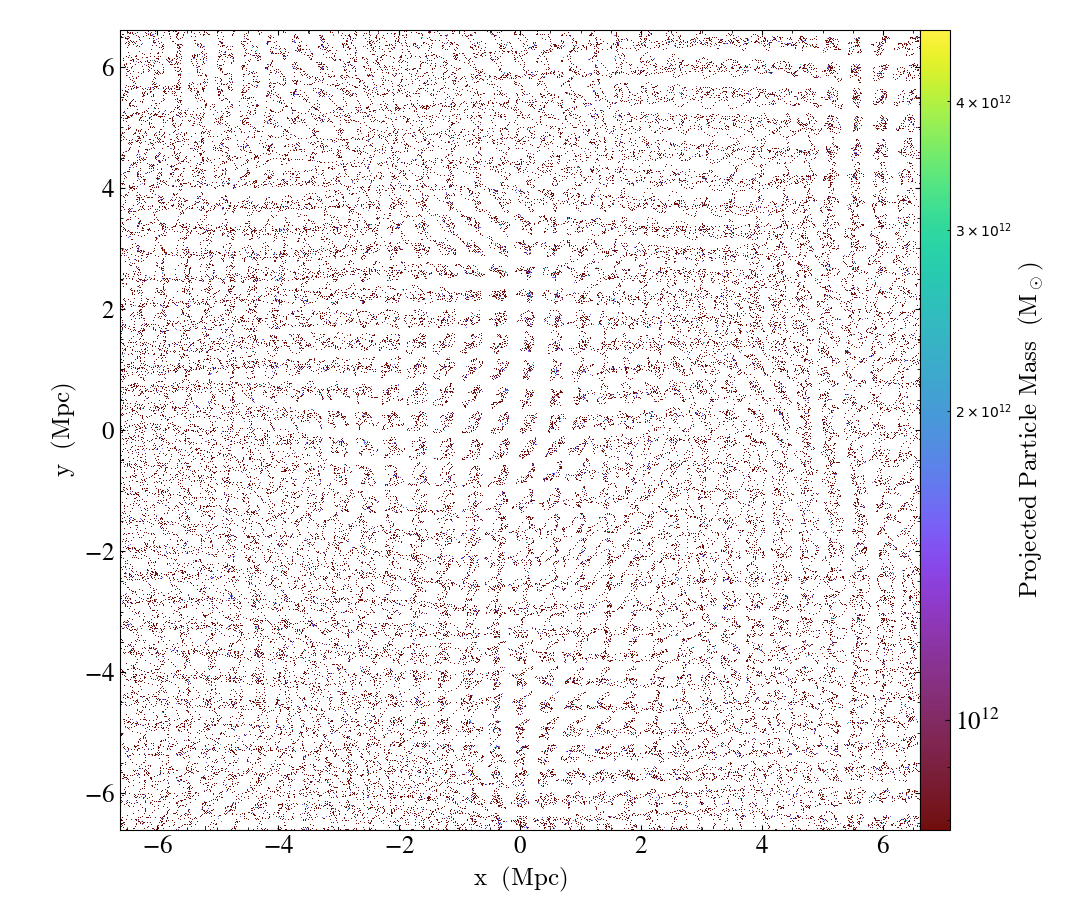

In [9]:
# create a particle plot, integrated through the z axis
plot0 = yt.ParticlePlot(dataset, 'particle_position_x', 
                        'particle_position_y', 'particle_mass', width=(0.5, 0.5))

# pick some appropriate units
plot0.set_axes_unit('Mpc')
plot0.set_unit('particle_mass', 'Msun')

#Display the plot in the notebook
plot0.show()

#Optionally, to save it to a file, uncomment the line below
#plot0.save("filename")

yt : [INFO     ] 2025-07-01 14:57:03,619 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:03,620 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:03,622 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:03,623 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:03,623 Making a fixed resolution buffer of (('enzo', 'Temperature')) 800 by 800



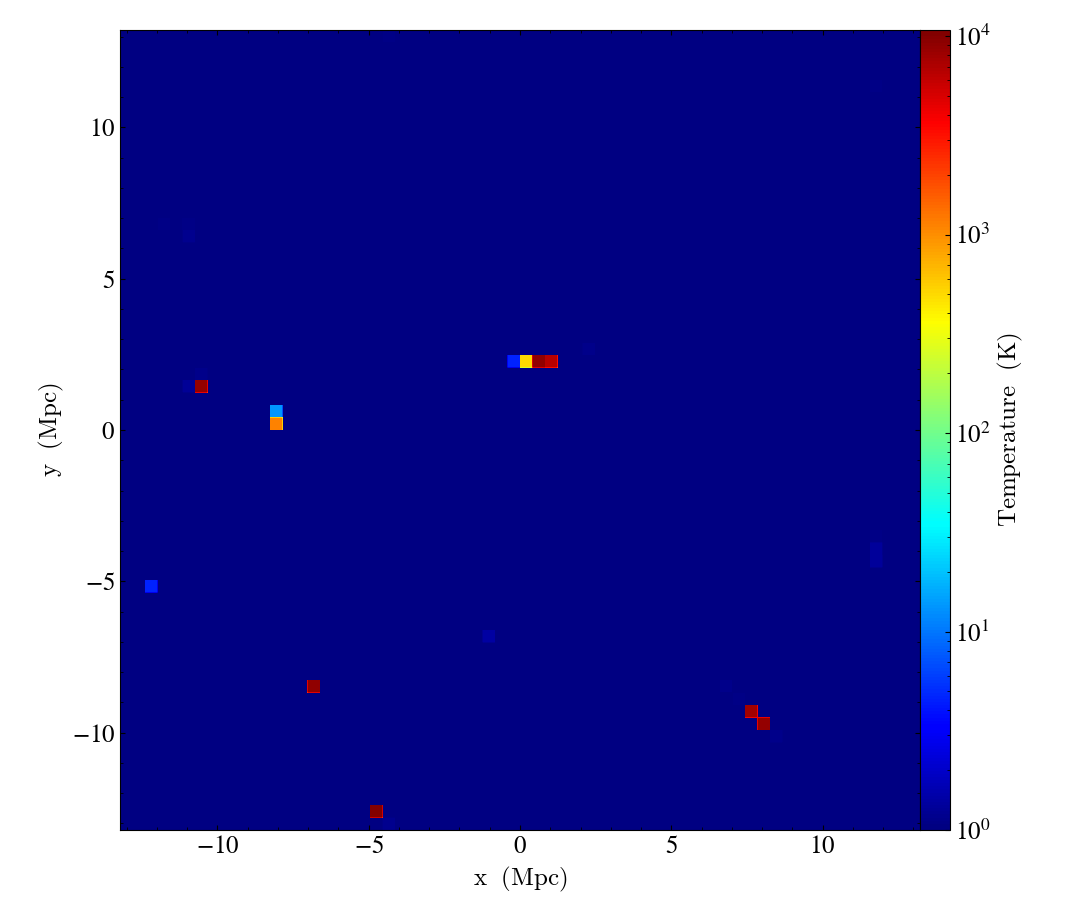

In [10]:
#Plot the temperature on a slice perpendicular to the z axis, centred on the middle of the grid
plot1 = yt.SlicePlot(dataset, "z" , "Temperature", center=[0.5,0.5,0.5])

#Try out a different colour scheme
plot1.set_cmap("Temperature", "Blue-Red")

#Display the plot in the notebook
plot1.show()

yt : [INFO     ] 2025-07-01 14:57:04,120 Projection completed
yt : [INFO     ] 2025-07-01 14:57:04,120 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:04,121 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:04,123 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:04,124 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:57:04,125 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



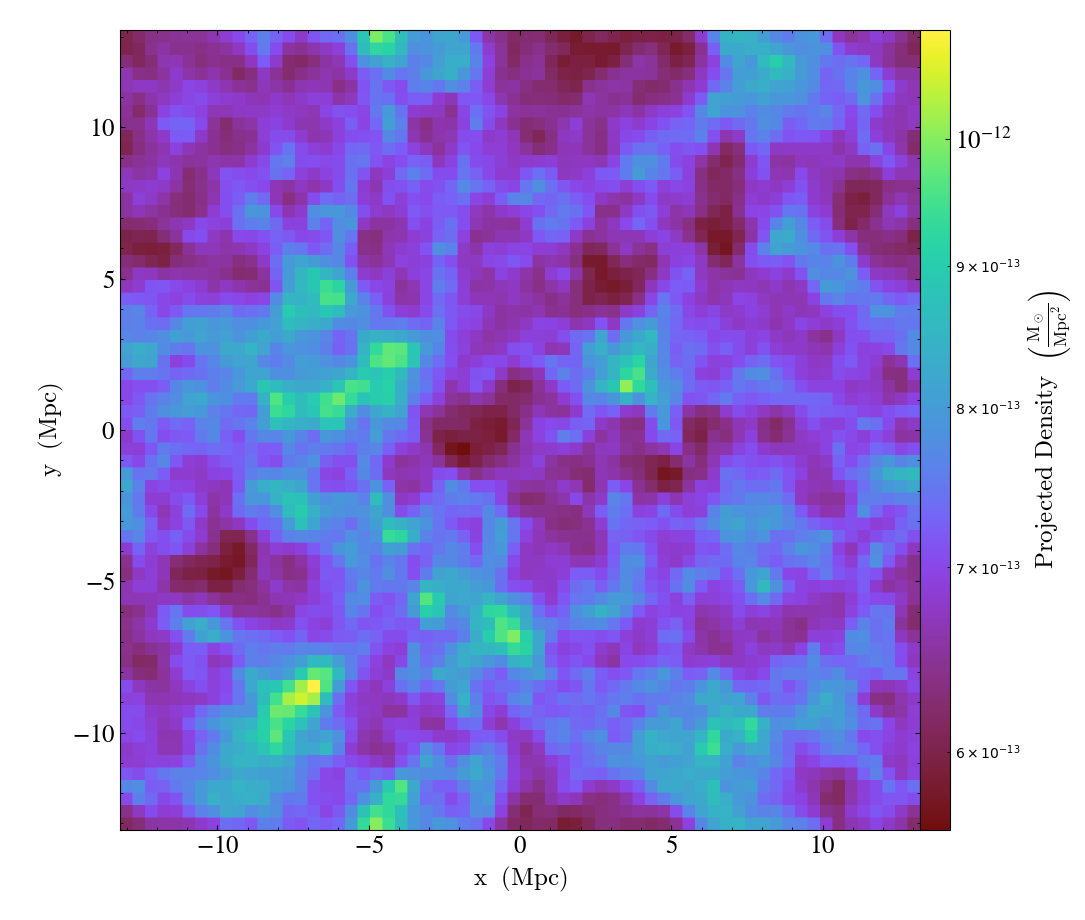

In [11]:
# Plot a projection of the density in the z direction
# ie an integral of the density through the box in this direction
plot2 = yt.ProjectionPlot(dataset, "z" , "Density")
plot2.set_unit('Density', 'Msun/Mpc/Mpc')

#Display the plot in the notebook
plot2.show()

yt : [INFO     ] 2025-07-01 14:57:04,474 Rendering scene (Can take a while).
yt : [INFO     ] 2025-07-01 14:57:04,475 Creating volume
yt : [INFO     ] 2025-07-01 14:57:04,497 Creating transfer function
yt : [INFO     ] 2025-07-01 14:57:04,497 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2025-07-01 14:57:05,459 Found previously rendered image to save.
yt : [INFO     ] 2025-07-01 14:57:05,460 Saving rendered image to data0003_Render_dark_matter_density.png


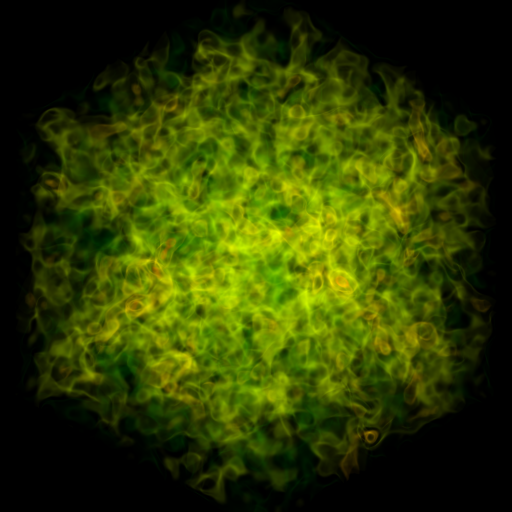

In [12]:
# Volume renderings are 3D projections rendering isocontours in any arbitrary field 
# (e.g. density, temperature, pressure, etc.)
# Create a volume rendering, which will determine data bounds, use the density
# field in the field_list, and set up a default transfer function (the function telling it what
# colour and opacity to assign to each level of density). 
# This will save a file to disk automatically, but we also ask to show it here
image, scene = yt.volume_render(dataset, field=('gas', 'dark_matter_density'))
scene.show()


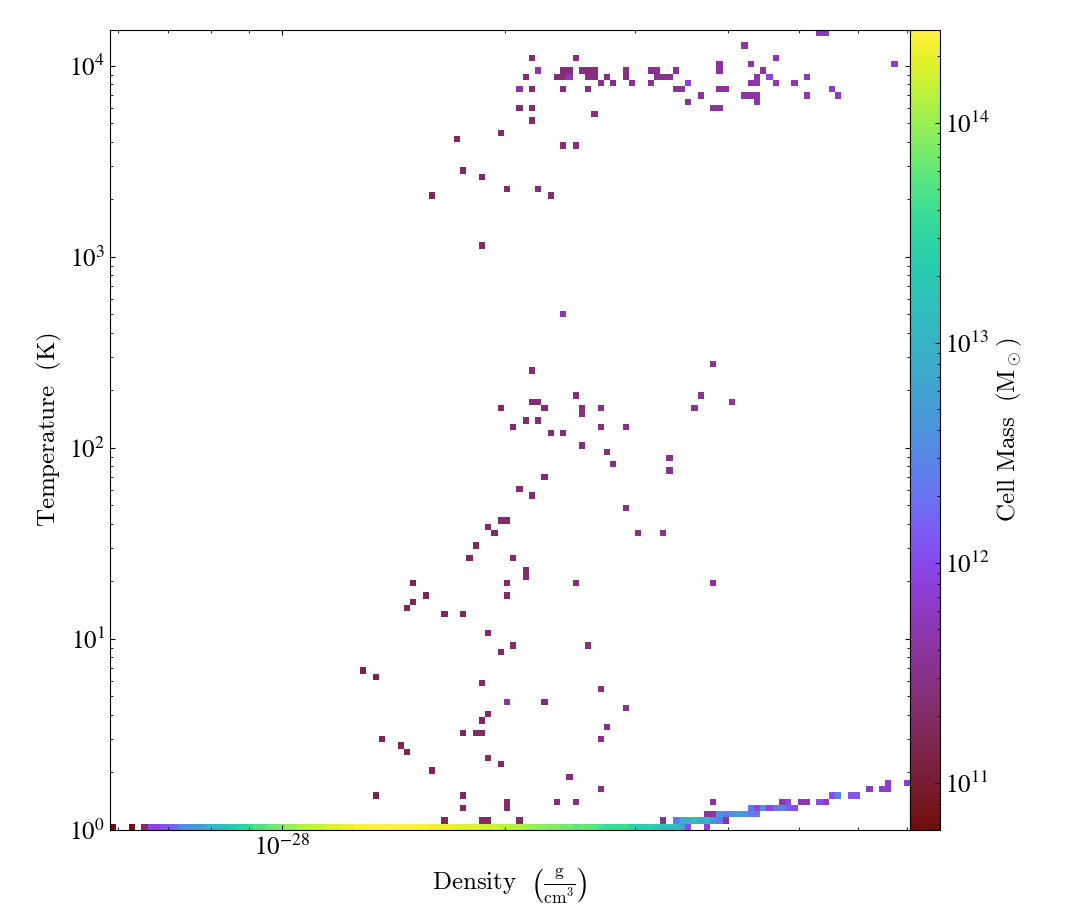

In [13]:
# Now we will create a phase plot

# Create a sphere of radius 10 Mpc in the center of the domain.
my_sphere = dataset.sphere("c", (10.0, "Mpc"))

# Create a PhasePlot object.
# (Setting weight to None calculates a simple unweighted sum.)
plot3 = yt.PhasePlot(my_sphere, "density", "temperature", "cell_mass",
                    weight_field=None)

# Set the units of mass to be in solar masses (not the default in cgs)
plot3.set_unit('cell_mass', 'Msun')

#Display the plot in the notebook
plot3.show()


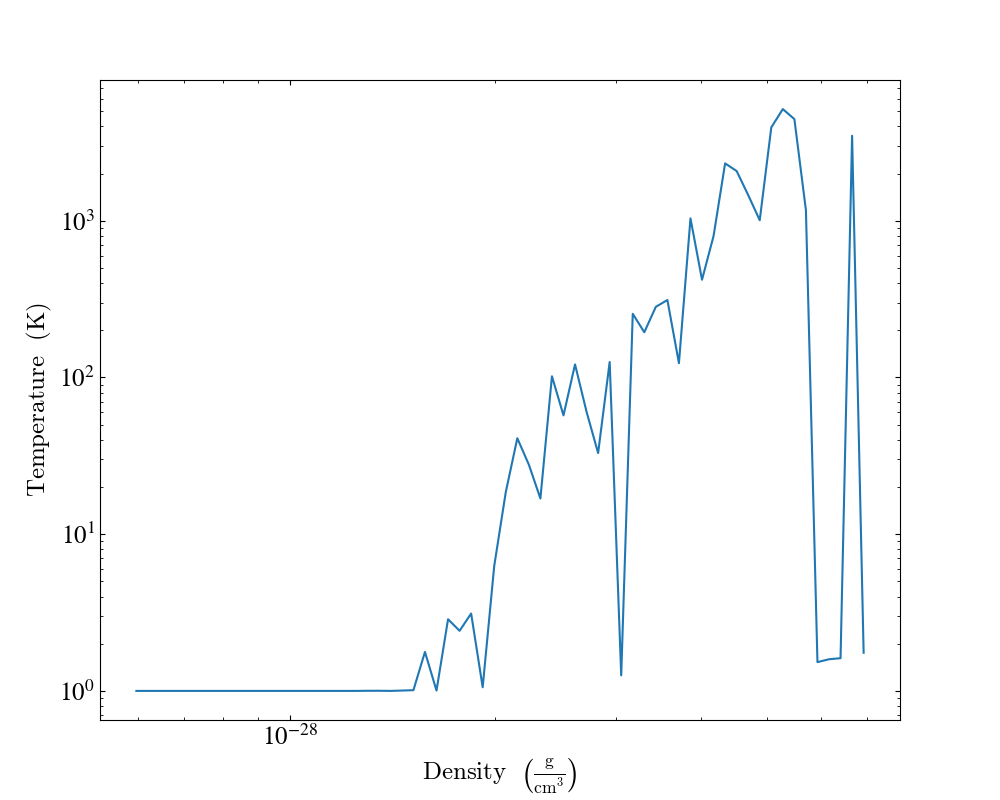

In [14]:
# Similarly, create a 1D profile within the sphere of the average temperature
# vs. density, weighted by mass.
plot4 = yt.ProfilePlot(my_sphere, "density", "temperature", weight_field="cell_mass")

#Display the plot in the notebook
plot4.show()

# Maximum and minimum density

In [15]:
value, location = dataset.find_max("Dark_Matter_Density")
print(value.in_units('g/Mpccm**3/h**3'))

yt : [INFO     ] 2025-07-01 14:57:06,472 max value is 4.02144e+00 at 0.2578125000000000 0.1015625000000000 0.2421875000000000


1.2012980309217627e+44 g/(Mpccm**3*h**3)


In [16]:
#g to GeV
print(str(float(value.in_units('g/Mpccm**3/h**3'))*5.62*10**22*0.7**(-3)) + ' number of particles per Mpccm**3')

1.9683075608688947e+67 number of particles per Mpccm**3


In [17]:
value, location = dataset.find_min("Dark_Matter_Density")
print(value.in_units('g/Mpccm**3/h**3'))

yt : [INFO     ] 2025-07-01 14:57:06,497 min value is 4.73596e-02 at 0.5078125000000000 0.6328125000000000 0.1953125000000000


1.4147416884479545e+42 g/(Mpccm**3*h**3)


In [18]:
value, location = dataset.find_max("Dark_Matter_Density")
print(value.in_units('g/Mpccm**3/h**3'))

yt : [INFO     ] 2025-07-01 14:57:06,518 max value is 4.02144e+00 at 0.2578125000000000 0.1015625000000000 0.2421875000000000


1.2012980309217627e+44 g/(Mpccm**3*h**3)


yt : [INFO     ] 2025-07-01 14:57:06,532 xlim = -0.309401 0.825026
yt : [INFO     ] 2025-07-01 14:57:06,532 ylim = -0.465651 0.668776
yt : [INFO     ] 2025-07-01 14:57:06,534 xlim = -0.309401 0.825026
yt : [INFO     ] 2025-07-01 14:57:06,535 ylim = -0.465651 0.668776
yt : [INFO     ] 2025-07-01 14:57:06,535 Making a fixed resolution buffer of (('enzo', 'z-velocity')) 800 by 800



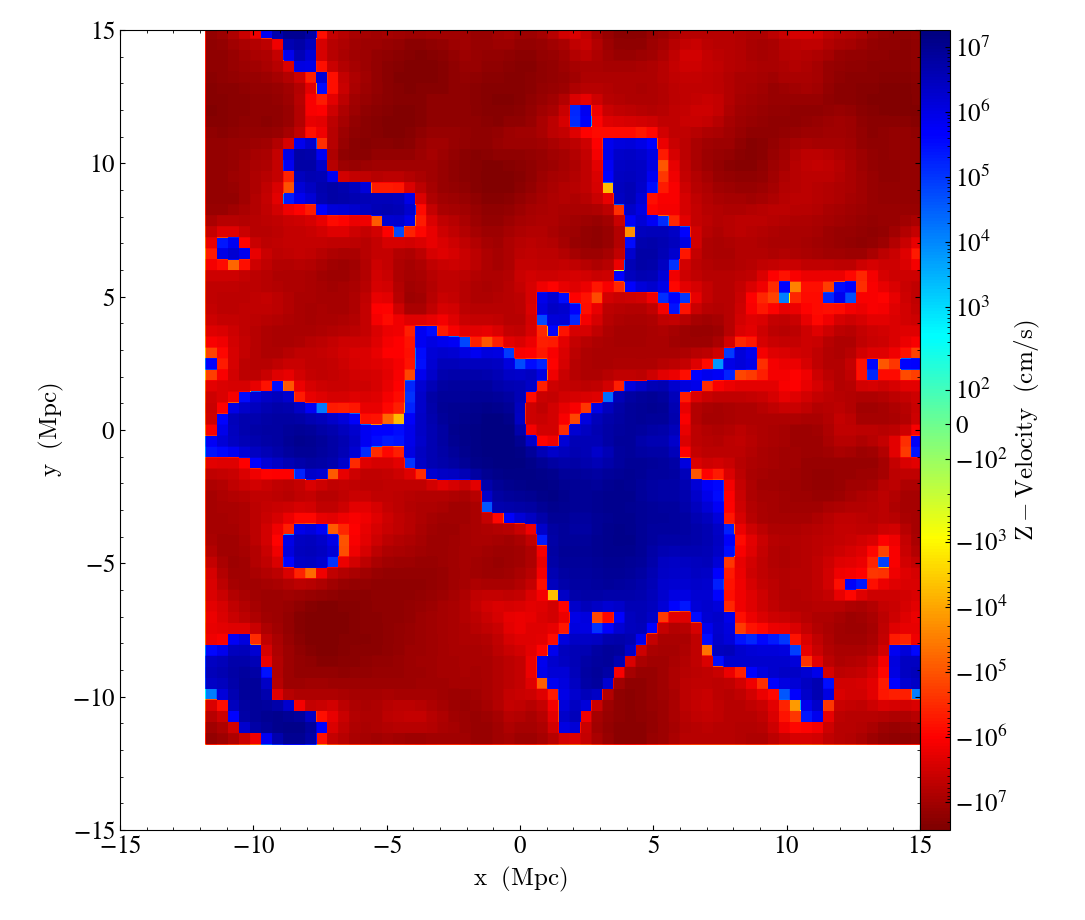

In [19]:
#Plot the temperature on a slice perpendicular to the z axis, centred on the middle of the grid
plot5 = yt.SlicePlot(dataset, "z" , "z-velocity", center=location, width=(30, "Mpc"))

#Try out a different colour scheme
plot5.set_cmap("z-velocity", "Blue-Red_r")
plot5.set_unit('z-velocity', 'cm/s')
#Display the plot in the notebook
plot5.show()

yt : [INFO     ] 2025-07-01 14:57:07,219 xlim = -0.309401 0.825026
yt : [INFO     ] 2025-07-01 14:57:07,219 ylim = -0.465651 0.668776
yt : [INFO     ] 2025-07-01 14:57:07,222 xlim = -0.309401 0.825026
yt : [INFO     ] 2025-07-01 14:57:07,223 ylim = -0.465651 0.668776
yt : [INFO     ] 2025-07-01 14:57:07,223 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



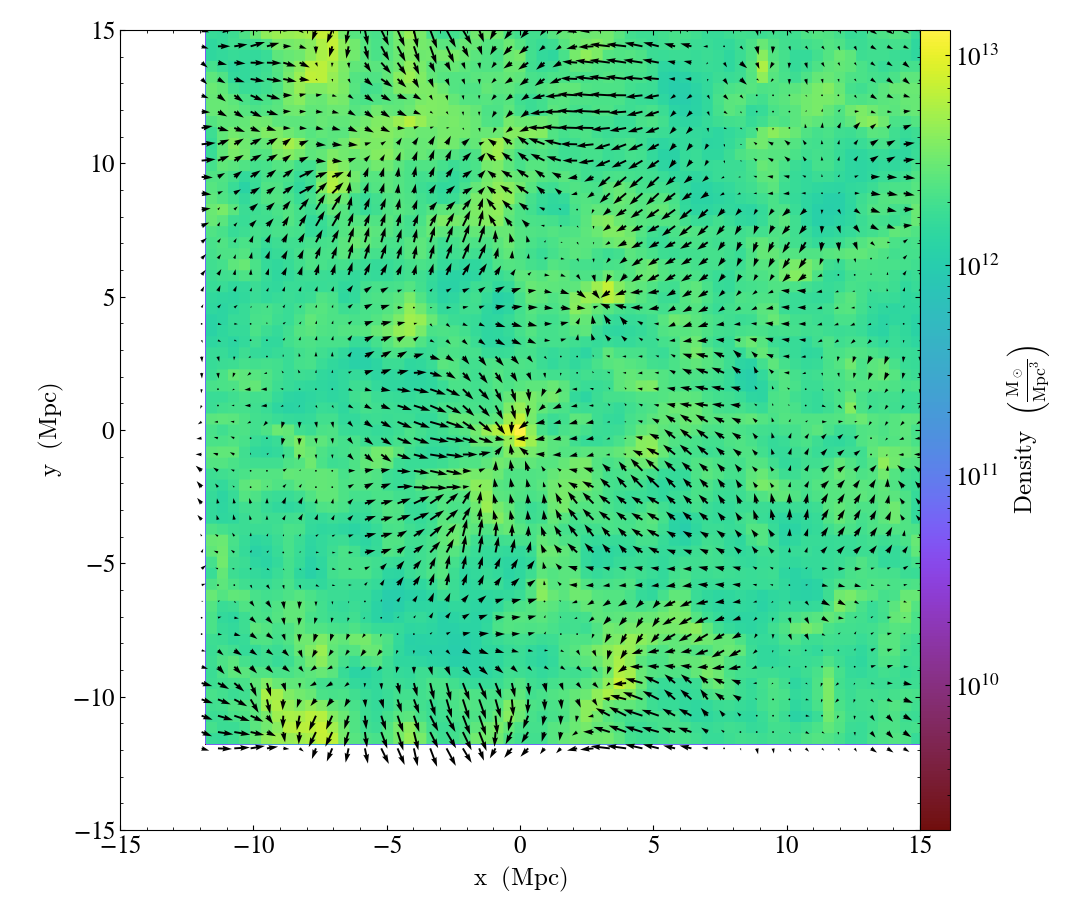

In [20]:
# Create the fifth plot: a slice with velocity vectors in the z-plane
plot5 = yt.SlicePlot(dataset, 'z', "Density", center=location, width=(30, "Mpc"))

plot5.set_unit('Density', 'Msun/Mpc/Mpc/Mpc')

# Annotate with velocity vectors
plot5.annotate_velocity()

# Save the plot
plot5.show()

yt : [INFO     ] 2025-07-01 14:57:07,668 xlim = -0.465651 0.668776
yt : [INFO     ] 2025-07-01 14:57:07,669 ylim = -0.325026 0.809401
yt : [INFO     ] 2025-07-01 14:57:07,671 xlim = -0.465651 0.668776
yt : [INFO     ] 2025-07-01 14:57:07,672 ylim = -0.325026 0.809401
yt : [INFO     ] 2025-07-01 14:57:07,673 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



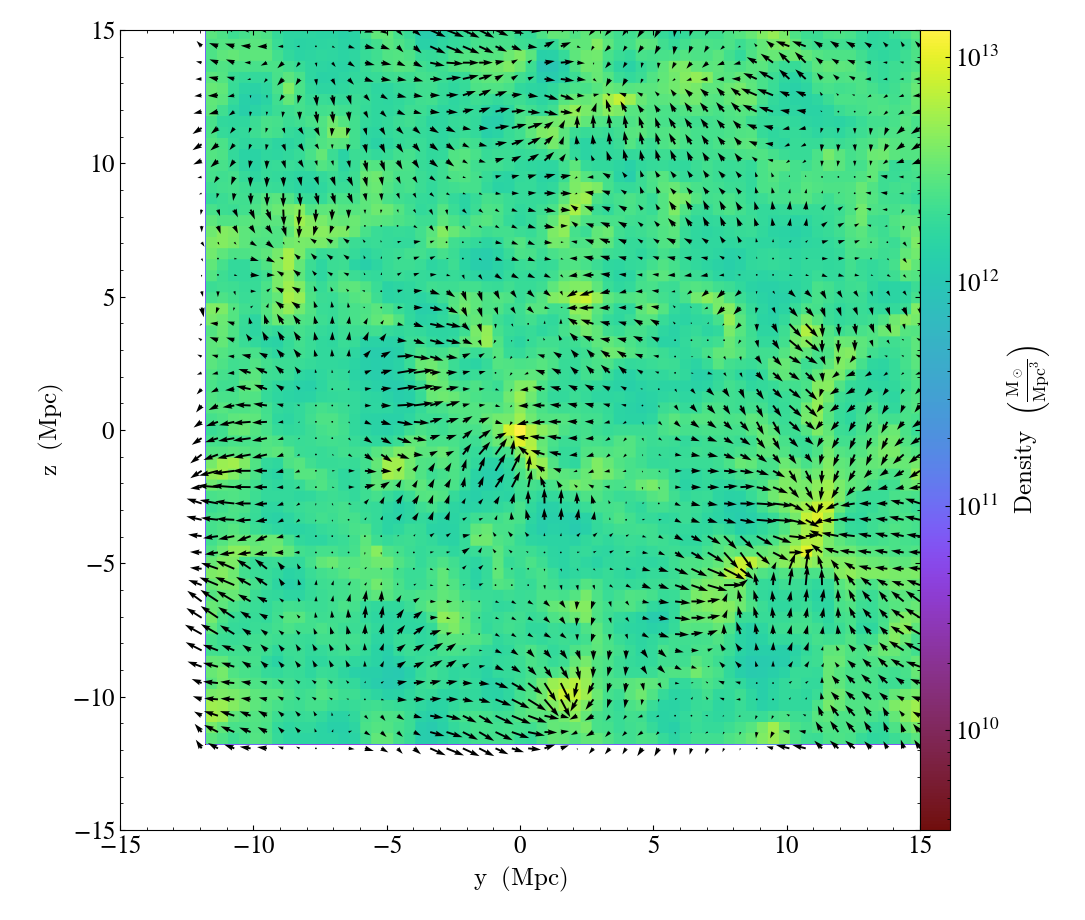

In [21]:
# Create the fifth plot: a slice with velocity vectors in the z-plane
plot5 = yt.SlicePlot(dataset, 'x', "Density", center=location, width=(30, "Mpc"))

plot5.set_unit('Density', 'Msun/Mpc/Mpc/Mpc')

# Annotate with velocity vectors
plot5.annotate_velocity()

# Save the plot
plot5.show()

yt : [INFO     ] 2025-07-01 14:57:08,124 xlim = -0.325026 0.809401
yt : [INFO     ] 2025-07-01 14:57:08,124 ylim = -0.309401 0.825026
yt : [INFO     ] 2025-07-01 14:57:08,127 xlim = -0.325026 0.809401
yt : [INFO     ] 2025-07-01 14:57:08,127 ylim = -0.309401 0.825026
yt : [INFO     ] 2025-07-01 14:57:08,128 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



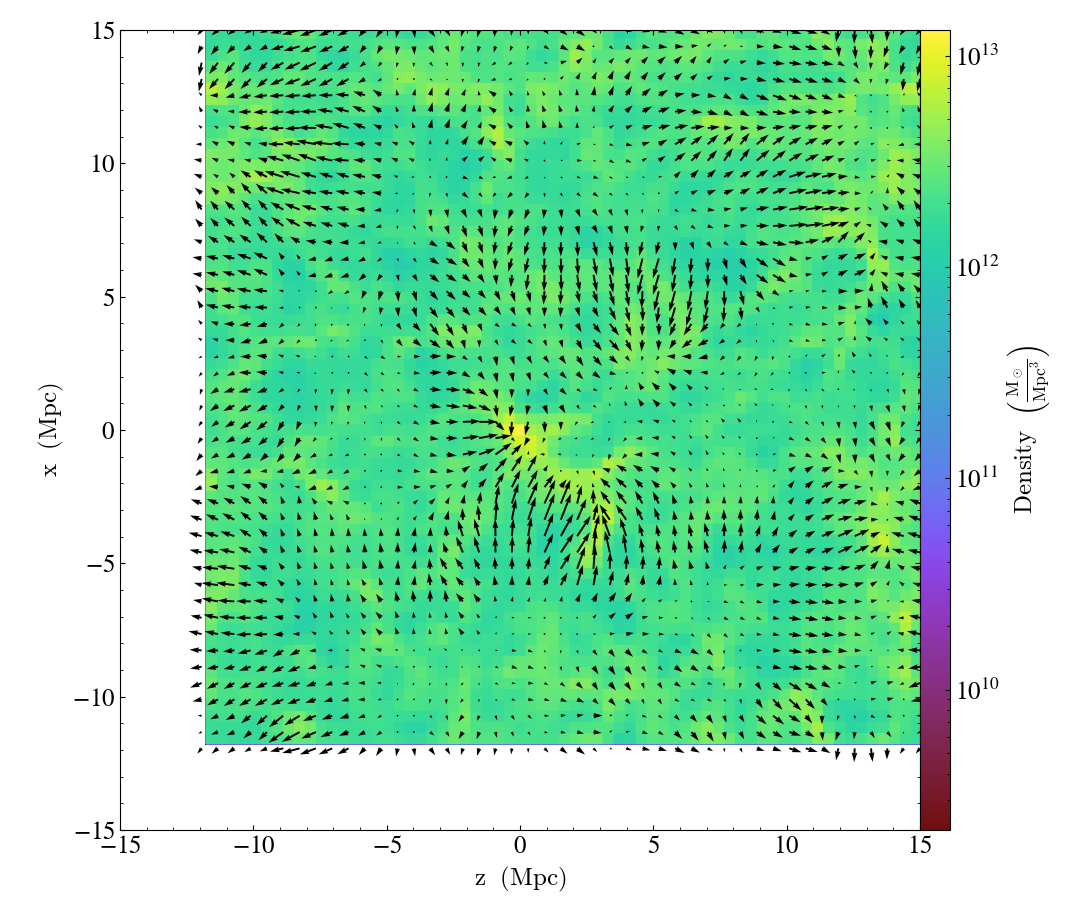

In [22]:
# Create the fifth plot: a slice with velocity vectors in the z-plane
plot5 = yt.SlicePlot(dataset, 'y', "Density", center=location, width=(30, "Mpc"))

plot5.set_unit('Density', 'Msun/Mpc/Mpc/Mpc')

# Annotate with velocity vectors
plot5.annotate_velocity()

# Save the plot
plot5.show()

In [23]:
#location of the time series data
location_alltimes = r"Enzo_64/DD00??/data00??"

# Create a time-series object.
#series = yt.simulation(location_alltimes, "Enzo")
series = yt.load(location_alltimes)

# max_density vs max redshift